In [15]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
df = pd.read_csv("forestfires (1).csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [20]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

df['month']= label_encoder.fit_transform(df['month']) 

df['day']= label_encoder.fit_transform(df['day']) 

df['size_category']= label_encoder.fit_transform(df['size_category']) 

In [28]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=0)
columns=list(df.columns)

In [29]:
predictors=columns[0:30]
target=columns[30]

In [23]:
#SVM Classification using Kernels: linear,poly,rbf

In [30]:
#kernel=linear
model_linear=SVC(kernel='linear')
model_linear.fit(train[predictors],train[target])
train_pred_linear=model_linear.predict(train[predictors])
test_pred_linear=model_linear.predict(test[predictors])

In [32]:
train_lin_acc=np.mean(train_pred_linear==train[target])
test_lin_acc=np.mean(test_pred_linear==test[target])

In [39]:
train_lin_acc

1.0

In [40]:
test_lin_acc

0.9711538461538461

In [36]:
#kernel=poly
model_poly=SVC(kernel='poly')
model_poly.fit(train[predictors],train[target])
train_pred_poly=model_poly.predict(train[predictors])
test_pred_poly=model_poly.predict(test[predictors])

In [37]:
train_poly_acc=np.mean(train_pred_poly==train[target])
test_poly_acc=np.mean(test_pred_poly==test[target])

In [41]:
train_poly_acc

0.7651331719128329

In [42]:
test_poly_acc

0.7788461538461539

In [43]:
#kernel=rbf
model_rbf=SVC(kernel='rbf')
model_rbf.fit(train[predictors],train[target])
train_pred_rbf=model_rbf.predict(train[predictors])
test_pred_rbf=model_rbf.predict(test[predictors])

In [44]:
train_rbf_acc=np.mean(train_pred_rbf==train[target])
test_rbf_acc=np.mean(test_pred_rbf==test[target])

In [45]:
train_rbf_acc

0.7554479418886199

In [46]:
test_rbf_acc

0.7403846153846154

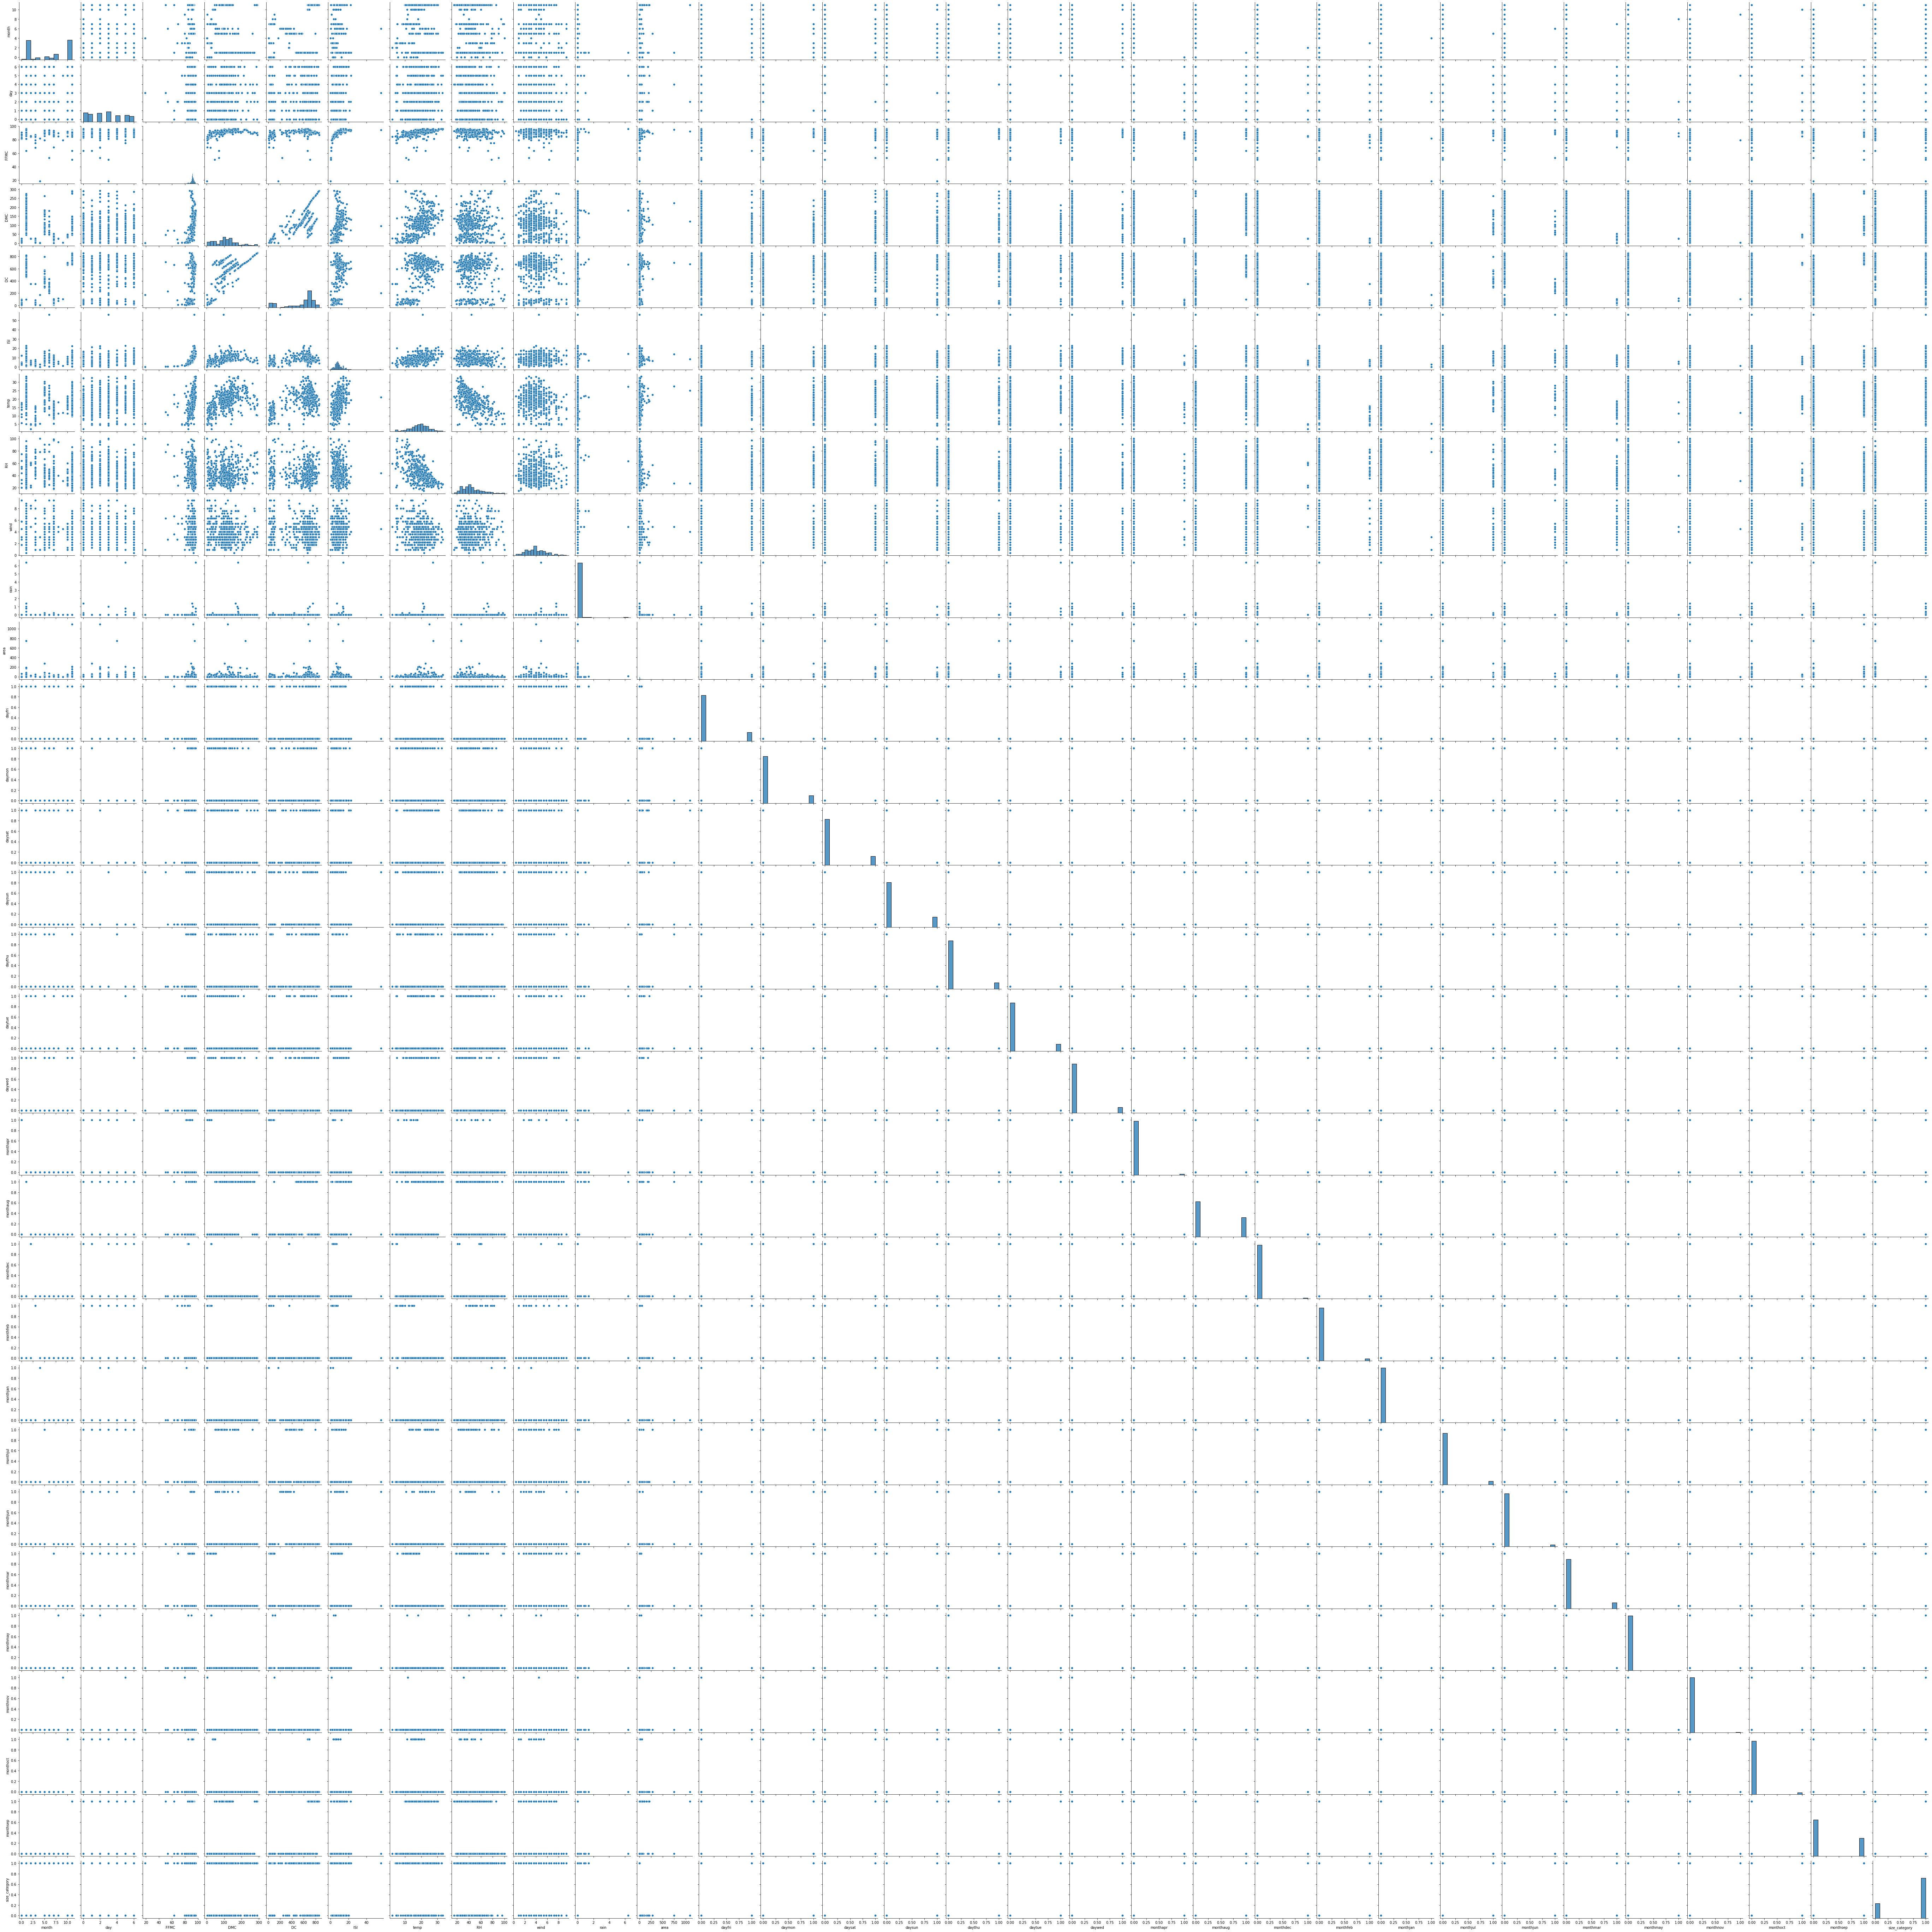

In [48]:
#Pair plot

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

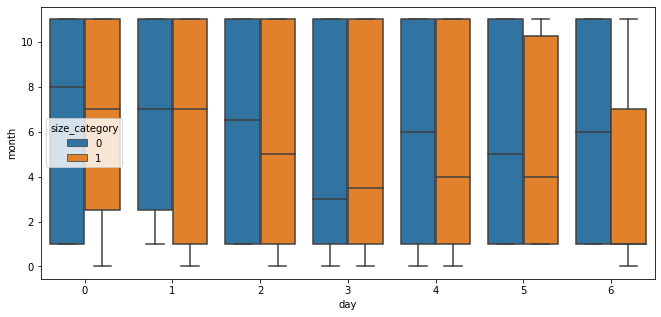

In [51]:
f, ax = plt.subplots(figsize=(11,5))
sns.boxplot(x="day", y="month", hue="size_category", data=df);

array([[<AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='day', ylabel='month'>,
        <AxesSubplot:xlabel='FFMC', ylabel='month'>,
        <AxesSubplot:xlabel='DMC', ylabel='month'>,
        <AxesSubplot:xlabel='DC', ylabel='month'>,
        <AxesSubplot:xlabel='ISI', ylabel='month'>,
        <AxesSubplot:xlabel='temp', ylabel='month'>,
        <AxesSubplot:xlabel='RH', ylabel='month'>,
        <AxesSubplot:xlabel='wind', ylabel='month'>,
        <AxesSubplot:xlabel='rain', ylabel='month'>,
        <AxesSubplot:xlabel='area', ylabel='month'>,
        <AxesSubplot:xlabel='dayfri', ylabel='month'>,
        <AxesSubplot:xlabel='daymon', ylabel='month'>,
        <AxesSubplot:xlabel='daysat', ylabel='month'>,
        <AxesSubplot:xlabel='daysun', ylabel='month'>,
        <AxesSubplot:xlabel='daythu', ylabel='month'>,
        <AxesSubplot:xlabel='daytue', ylabel='month'>,
        <AxesSubplot:xlabel='daywed', ylabel='month'>,
        <AxesSubplot:xlabel='monthapr'

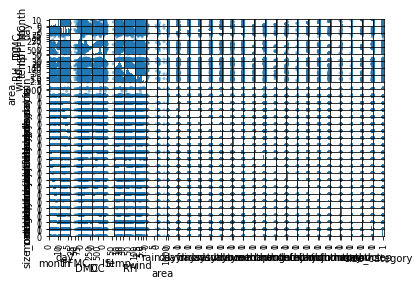

In [54]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)